#**Importing Libraries**


In [1]:
import tensorflow as tf
import keras
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import sklearn
import torch
import scipy
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,train_test_split

#**Importing Dataset**

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/merged_dataset_processed.csv")
dataset

,File,Filename,First_commit,Last_commit,Total_commits,TIME_COST_IN_DAYS,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Number_of_Authors,Time_Class
0,https://github.com/Anish-Agnihotri/dhof-loot/b...,images.js,"Aug 27, 2021","Aug 28, 2021",1,1,31,228,1,4,0,1,1,0,0,1,1
1,https://github.com/Anish-Agnihotri/dhof-loot/b...,index.js,"Aug 27, 2021","Aug 28, 2021",2,1,36,230,1,2,0,0,1,0,0,1,1
2,https://github.com/Anish-Agnihotri/dhof-loot/b...,parse.js,"Aug 27, 2021","Sep 3, 2021",8,7,53,467,6,6,1,0,6,0,0,1,1
3,https://github.com/HashLips/generative-art-ope...,index1.js,"Aug 24, 2021","Sep 1, 2021",7,8,183,1280,26,35,1,3,2,2,0,1,1
4,https://github.com/HashLips/generative-art-ope...,config.js,"Aug 24, 2021","Sep 2, 2021",7,9,113,637,10,16,1,5,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://github.com/mozilla/pdf.js/blob/master/...,simpleviewer.js,"Sep 30, 2014","Jul 29, 2021",23,2494,51,270,2,3,1,2,0,0,0,5,6
196,https://github.com/mozilla/pdf.js/blob/master/...,viewer.js,"Jul 27, 2016","Mar 12, 2021",23,1689,344,1930,35,68,18,18,0,2,0,5,5
197,https://github.com/mozilla/pdf.js/blob/master/...,pdf2svg.js,"Aug 14, 2014","Mar 12, 2021",25,2402,104,700,15,20,14,3,1,1,0,5,6
198,https://github.com/mozilla/pdf.js/blob/master/...,getinfo.js,"Apr 19, 2014","Mar 12, 2021",17,2519,55,391,9,11,7,1,1,0,0,5,6


#**Methodology 2(b.1)**

##**Seperating Labels from Dataset**

In [3]:
TCC_lbl = dataset["Time_Class"]

In [4]:
TCC_lbl.value_counts()

1    56
5    39
3    35
6    34
2    30
4     6
Name: Time_Class, dtype: int64

##**Keeping the columns with only numerical data**

In [5]:
dataset_unlbl = dataset.drop(columns=["File","Filename","First_commit","Last_commit","Time_Class","TIME_COST_IN_DAYS","CYCLOMATIC COMPLEXITY"])

In [6]:
dataset_unlbl

,Total_commits,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Number_of_Authors
0,1,31,228,1,0,1,1,0,0,1
1,2,36,230,1,0,0,1,0,0,1
2,8,53,467,6,1,0,6,0,0,1
3,7,183,1280,26,1,3,2,2,0,1
4,7,113,637,10,1,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
195,23,51,270,2,1,2,0,0,0,5
196,23,344,1930,35,18,18,0,2,0,5
197,25,104,700,15,14,3,1,1,0,5
198,17,55,391,9,7,1,1,0,0,5


##**Splitting the dataset into train and test**

In [7]:
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_unlbl, TCC_lbl, test_size=0.2, random_state=1)


In [8]:
print(dataset_X_train.shape)
print(dataset_X_test.shape)

(160, 10)
(40, 10)


##**Creating lists to store model data and scores**

In [9]:
Classifier = []
Type = []
hyper = []
Accuracy = []
F1_score = []
Recall = []
Precision = []

#**MACHINE LEARNING**

##**Creating models by tuning hyperparameters**

In [10]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score , accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()

# Create regularization solver space
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# Create regularization penalty space
penalty = ['l1','l2']
# Create regularization hyperparameter space
c_values = numpy.logspace(0, 5, 20)
# Create hyperparameter options
hyperparameters_LR = dict(solver=solvers,penalty=penalty,C=c_values)

#Using RepeatedStratifiedKFold perform 10 splits for cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Finding the Best Values of hyperparameters using GridSearchCV
clf_LR = GridSearchCV(estimator=classifier_LR, param_grid=hyperparameters_LR, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.svm import SVC
classifier_SVM = SVC()  
# defining parameter range
hyperparameters_SVM = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf']} 
  
clf_SVM = GridSearchCV(estimator=classifier_SVM, param_grid = hyperparameters_SVM ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [10,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
hyperparameters_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
  
clf_RF = GridSearchCV(estimator=classifier_RF, param_grid = hyperparameters_RF ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0) 

##**Training and testing before hyperparameter tuning**

In [11]:
SVM = classifier_SVM.fit(dataset_X_train, dataset_y_train)

y_pred_SVM = SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM))


Classifier.append("SVM")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM,average='macro'))
#ROC_AUC.append(roc_curve(dataset_y_test,y_pred_SVM,multi_class='ovr'))

Test - ACC :  0.35
Test  : 
              precision    recall  f1-score   support

           1       0.33      0.92      0.49        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       0.60      0.43      0.50         7

    accuracy                           0.35        40
   macro avg       0.16      0.22      0.16        40
weighted avg       0.20      0.35      0.23        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
LR = classifier_LR.fit(dataset_X_train, dataset_y_train)

# Predicting the Test set results
y_pred_LR = LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR))


Classifier.append("LR")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR))
F1_score.append(f1_score(dataset_y_test,y_pred_LR,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

Test - ACC :  0.25
Test  : 
              precision    recall  f1-score   support

           1       0.20      0.08      0.12        12
           2       0.00      0.00      0.00         7
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       0.17      0.12      0.14         8
           6       0.29      1.00      0.45         7

    accuracy                           0.25        40
   macro avg       0.14      0.24      0.16        40
weighted avg       0.16      0.25      0.17        40



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [13]:
RF = classifier_RF.fit(dataset_X_train, dataset_y_train)


# Predicting the Test set results
y_pred_RF = RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF))



Classifier.append("RF")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF))
F1_score.append(f1_score(dataset_y_test,y_pred_RF,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

Test - ACC :  0.5
Test  : 
              precision    recall  f1-score   support

           1       0.54      0.58      0.56        12
           2       0.50      0.14      0.22         7
           3       0.30      0.75      0.43         4
           4       0.00      0.00      0.00         2
           5       0.67      0.50      0.57         8
           6       0.56      0.71      0.63         7

    accuracy                           0.50        40
   macro avg       0.43      0.45      0.40        40
weighted avg       0.51      0.50      0.47        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


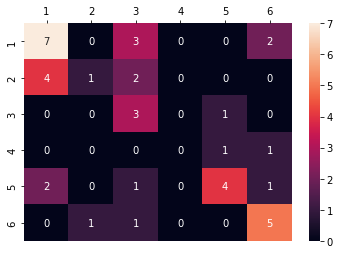

In [67]:

ml_cm = confusion_matrix(dataset_y_test,y_pred_RF)

ax = sns.heatmap(ml_cm,xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6],annot=True)
ax.xaxis.set_ticks_position('top')
plt.show()

##**Training and testing after hyperparameter tuning**

In [15]:
best_SVM = clf_SVM.fit(dataset_X_train, dataset_y_train)

print(best_SVM.best_params_)
print("-------------------------------")

y_pred_SVM_best = best_SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM_best))


Classifier.append("SVM")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM_best))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_SVM,multi_class="ovr"))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 10000, 'gamma': 1e-05, 'kernel': 'rbf'}
-------------------------------
Test - ACC :  0.375
Test  : 
              precision    recall  f1-score   support

           1       0.43      0.75      0.55        12
           2       0.33      0.14      0.20         7
           3       0.33      0.50      0.40         4
           4       0.00      0.00      0.00         2
           5       0.50      0.25      0.33         8
           6       0.17      0.14      0.15         7

    accuracy                           0.38        40
   macro avg       0.29      0.30      0.27        40
weighted avg       0.35      0.38      0.33        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
best_LR = clf_LR.fit(dataset_X_train, dataset_y_train)

print(best_LR.best_params_)
print("-------------------------------")

# Predicting the Test set results
y_pred_LR_best = best_LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR_best))


Classifier.append("LR")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR_best))
F1_score.append(f1_score(dataset_y_test,y_pred_LR_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 127.42749857031335, 'penalty': 'l2', 'solver': 'newton-cg'}
-------------------------------
Test - ACC :  0.45
Test  : 
              precision    recall  f1-score   support

           1       0.50      0.58      0.54        12
           2       0.50      0.29      0.36         7
           3       0.40      0.50      0.44         4
           4       0.00      0.00      0.00         2
           5       0.29      0.25      0.27         8
           6       0.71      0.71      0.71         7

    accuracy                           0.45        40
   macro avg       0.40      0.39      0.39        40
weighted avg       0.46      0.45      0.45        40



/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [17]:
best_RF = clf_RF.fit(dataset_X_train, dataset_y_train)

print(best_RF.best_params_)
print("-------------------------------")
# Predicting the Test set results
y_pred_RF_best = best_RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF_best))



Classifier.append("RF")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF_best))
F1_score.append(f1_score(dataset_y_test,y_pred_RF_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-------------------------------
Test - ACC :  0.525
Test  : 
              precision    recall  f1-score   support

           1       0.54      0.58      0.56        12
           2       1.00      0.14      0.25         7
           3       0.40      1.00      0.57         4
           4       0.00      0.00      0.00         2
           5       0.57      0.50      0.53         8
           6       0.56      0.71      0.63         7

    accuracy                           0.53        40
   macro avg       0.51      0.49      0.42        40
weighted avg       0.59      0.53      0.48        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**DEEP LEARNING**

In [18]:
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

##**BEFORE HYPERPARAMETER TUNING**

###**Creating models**

In [19]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(32)
# GRU and LSTM
model_gru = create_model(32, GRU)
model_lstm = create_model(32, LSTM)

###**Reshaping and changing data type of data as per model**

In [20]:
dataset_X_train1 = dataset_X_train.values.reshape(160,10,1)
print(dataset_X_train1.dtype)
print(dataset_y_train.dtype)
dataset_X_train1 = dataset_X_train1.astype(float)
dataset_y_train1 = dataset_y_train.astype(float)
print(dataset_X_train1.dtype)
print(dataset_y_train1.dtype)

int64
int64
float64
float64


###**Training the deep learning models**

In [21]:

# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 1000,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks = [early_stop])
    return history



In [22]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/1000
13/13 [==============================] - 14s 155ms/step - loss: 8.6356 - val_loss: 5.7821
Epoch 2/1000
13/13 [==============================] - 0s 14ms/step - loss: 3.3037 - val_loss: 2.9185
Epoch 3/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.8772 - val_loss: 3.1166
Epoch 4/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.5611 - val_loss: 3.2922
Epoch 5/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.3646 - val_loss: 2.9592
Epoch 6/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.1672 - val_loss: 3.0860
Epoch 7/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.0756 - val_loss: 3.1176
Epoch 8/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.0066 - val_loss: 3.1510
Epoch 9/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.9666 - val_loss: 3.1437
Epoch 10/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.9296 - val_

In [23]:
history_lstm = fit_model(model_lstm)

Epoch 1/1000
13/13 [==============================] - 4s 75ms/step - loss: 11.2004 - val_loss: 11.1752
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 6.0044 - val_loss: 5.4306
Epoch 3/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.4675 - val_loss: 3.2677
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.1969 - val_loss: 3.1608
Epoch 5/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.0558 - val_loss: 3.5821
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.9197 - val_loss: 3.2930
Epoch 7/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.6539 - val_loss: 3.3478
Epoch 8/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.4623 - val_loss: 3.5219
Epoch 9/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.3548 - val_loss: 3.5645
Epoch 10/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.4079 - val_

In [24]:
history_gru = fit_model(model_gru)

Epoch 1/1000
13/13 [==============================] - 4s 70ms/step - loss: 11.9398 - val_loss: 11.2279
Epoch 2/1000
13/13 [==============================] - 0s 9ms/step - loss: 5.5613 - val_loss: 4.7850
Epoch 3/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.9758 - val_loss: 2.9631
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.1798 - val_loss: 3.4445
Epoch 5/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.5943 - val_loss: 3.9035
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.5459 - val_loss: 3.6233
Epoch 7/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.2586 - val_loss: 3.4028
Epoch 8/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.3065 - val_loss: 3.4912
Epoch 9/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.3803 - val_loss: 3.7692
Epoch 10/1000
13/13 [==============================] - 0s 11ms/step - loss: 2.4554 - val_loss:

###**Plotting graph for train and validation loss**

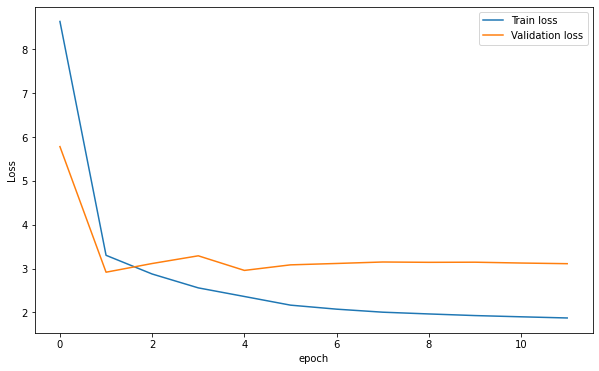

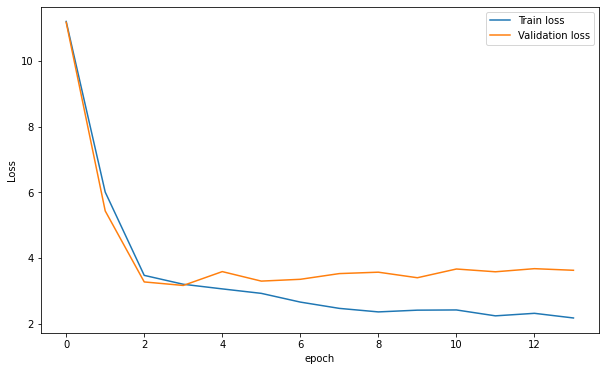

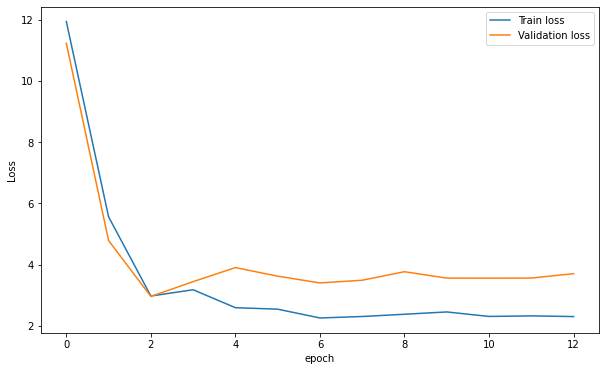

In [25]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm)
plot_loss (history_lstm)
plot_loss (history_gru)

###**Testing the deep learning models**

In [26]:
dataset_X_test1 = dataset_X_test.values.reshape(40,10,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm = prediction_func(model_bilstm)
prediction_lstm = prediction_func(model_lstm)
prediction_gru = prediction_func(model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm.round(), dataset_y_test))
print(classification_report(prediction_bilstm.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_bilstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm.round(), dataset_y_test))
print(classification_report(prediction_lstm.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_lstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru.round(), dataset_y_test))
print(classification_report(prediction_gru.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_gru.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru.round(), dataset_y_test,average='macro'))


Accuracy :  0.3
              precision    recall  f1-score   support

         1.0       0.08      1.00      0.15         1
         2.0       0.71      0.31      0.43        16
         3.0       0.25      0.09      0.13        11
         4.0       0.50      0.25      0.33         4
         5.0       0.12      0.25      0.17         4
         6.0       0.43      0.75      0.55         4

    accuracy                           0.30        40
   macro avg       0.35      0.44      0.29        40
weighted avg       0.46      0.30      0.32        40

Accuracy :  0.15
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.25      0.35        16
         3.0       0.25      0.08      0.12        12
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         7
         6.0       0.14      1.00      0.25         1

    accuracy                           0.15 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**AFTER HYPERPARAMETER TUNING**

###**Creating models**

In [27]:
# Create BiLSTM model
def create_best_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model
# Create LSTM or GRU model
def create_best_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model

# BiLSTM
best_model_bilstm = create_best_model_bilstm(32)
# GRU and LSTM
best_model_gru = create_best_model(32, GRU)
best_model_lstm = create_best_model(32, LSTM)

##**Hyperparameter Tuning - 1 : Best Epoch Value**

In [28]:
def best_ep_fit_model(model,ep):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = ep,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks=[early_stop])
    return history


###**Training models for range of epoch values and measure Mean Square Error(mse) score**

In [29]:
epochs_range= [500,1000,2000,5000,7000]
mse_dict_bilstm1 = {}
mse_dict_lstm1 = {}
mse_dict_gru1 = {}
for i in epochs_range:
  history_bilstm1 = best_ep_fit_model(best_model_bilstm,i)
  mse_dict_bilstm1[i]=history_bilstm1.history['mse']
  history_lstm1 = best_ep_fit_model(best_model_lstm,i)
  mse_dict_lstm1[i]=history_lstm1.history['mse']
  history_gru1 = best_ep_fit_model(best_model_gru,i)
  mse_dict_gru1[i]=history_gru1.history['mse']

Epoch 1/500
13/13 [==============================] - 9s 136ms/step - loss: 7.9774 - mse: 7.9774 - val_loss: 4.6655 - val_mse: 4.6655
Epoch 2/500
13/13 [==============================] - 0s 15ms/step - loss: 3.1724 - mse: 3.1724 - val_loss: 2.7759 - val_mse: 2.7759
Epoch 3/500
13/13 [==============================] - 0s 15ms/step - loss: 2.7384 - mse: 2.7384 - val_loss: 3.3016 - val_mse: 3.3016
Epoch 4/500
13/13 [==============================] - 0s 15ms/step - loss: 2.4870 - mse: 2.4870 - val_loss: 3.1422 - val_mse: 3.1422
Epoch 5/500
13/13 [==============================] - 0s 16ms/step - loss: 2.2617 - mse: 2.2617 - val_loss: 2.9233 - val_mse: 2.9233
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 2.1053 - mse: 2.1053 - val_loss: 3.1365 - val_mse: 3.1365
Epoch 7/500
13/13 [==============================] - 0s 15ms/step - loss: 2.0416 - mse: 2.0416 - val_loss: 3.0703 - val_mse: 3.0703
Epoch 8/500
13/13 [==============================] - 0s 15ms/step - loss: 1

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [30]:
mse_dict_bilstm1

{500: [7.977365016937256,
  3.17244553565979,
  2.7383763790130615,
  2.487004041671753,
  2.26171875,
  2.105252742767334,
  2.041599750518799,
  1.982907772064209,
  1.9532041549682617,
  1.9208546876907349,
  1.8927030563354492,
  1.8671141862869263],
 1000: [1.8431925773620605,
  1.820992112159729,
  1.8007522821426392,
  1.7827353477478027,
  1.765223741531372,
  1.7494897842407227,
  1.7357251644134521,
  1.723281741142273,
  1.7123140096664429,
  1.7024670839309692,
  1.6935455799102783,
  1.6853106021881104,
  1.6775593757629395,
  1.6701271533966064,
  1.6628965139389038,
  1.655934453010559,
  1.6493064165115356,
  1.642795205116272,
  1.636549711227417,
  1.6305294036865234,
  1.6246427297592163,
  1.6188689470291138,
  1.6131807565689087,
  1.6075019836425781,
  1.6017513275146484,
  1.5959104299545288,
  1.5900574922561646,
  1.5842729806900024,
  1.578399658203125,
  1.572079062461853,
  1.565755844116211,
  1.5590059757232666,
  1.5523674488067627,
  1.5459368228912354,


###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [31]:
for i in epochs_range:
  mse_dict_bilstm1[i] = mse_dict_bilstm1[i][-10:]
  mse_dict_lstm1[i] = mse_dict_lstm1[i][-10:]
  mse_dict_gru1[i] = mse_dict_gru1[i][-10:]

###**Bilstm**

In [32]:
mse_epochs_bilstm1 = pd.DataFrame.from_dict(mse_dict_bilstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_bilstm1

,500,1000,2000,5000,7000
mean,2.125074,1.056324,0.763719,0.660139,0.366800
std,0.287742,0.071719,0.064646,0.127970,0.060437
min,1.867114,0.975314,0.673743,0.530412,0.300684
25%,1.928942,0.997445,0.716479,0.565975,0.315818
50%,2.012254,1.043222,0.762727,0.601096,0.343647
75%,2.222602,1.107771,0.814338,0.741913,0.420524
max,2.738376,1.187039,0.851796,0.898637,0.465603


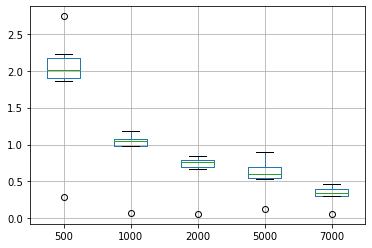

In [33]:
boxplot_11 = mse_epochs_bilstm1.boxplot(column=[500,1000,2000,5000,7000])

###**Lstm**

In [34]:
mse_epochs_lstm1 = pd.DataFrame.from_dict(mse_dict_lstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_lstm1

,500,1000,2000,5000,7000
mean,2.265541,2.063764,1.745178,1.575378,1.198242
std,0.107149,0.039945,0.082554,0.087182,0.086482
min,2.085811,2.017123,1.622903,1.441555,1.069617
25%,2.191831,2.035420,1.700859,1.540443,1.151509
50%,2.292088,2.052952,1.730198,1.561239,1.172142
75%,2.337526,2.083493,1.814009,1.604460,1.244852
max,2.404176,2.142603,1.860550,1.734501,1.377644


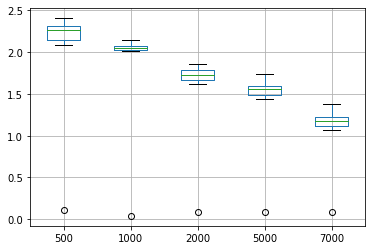

In [35]:
boxplot_12 = mse_epochs_lstm1.boxplot(column=[500,1000,2000,5000,7000])

###**GRU**

In [36]:
mse_epochs_gru1 = pd.DataFrame.from_dict(mse_dict_gru1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_gru1

,500,1000,2000,5000,7000
mean,2.530230,1.626784,1.637255,1.487016,1.410773
std,0.220926,0.083594,0.103717,0.090078,0.104073
min,2.242899,1.529297,1.481773,1.355461,1.269600
25%,2.318976,1.546251,1.560332,1.410924,1.347316
50%,2.560797,1.618095,1.650978,1.491712,1.393301
75%,2.707111,1.695893,1.700618,1.564165,1.421456
max,2.815320,1.760661,1.786265,1.613529,1.631607


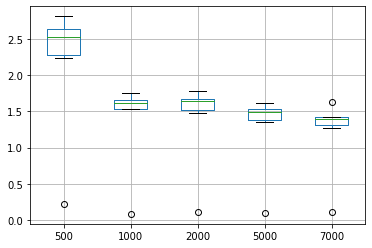

In [37]:
boxplot_13 = mse_epochs_gru1.boxplot(column=[500,1000,2000,5000,7000])

##**Hyperparameter Tuning - 2 : Best Batch Size**

In [38]:
def best_bs_fit_model(model,bs):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = bs, 
                        shuffle = False, callbacks=[early_stop])
    return history

###**Training models for range of batch size values and measure Mean Square Error(mse) score**

In [39]:
batch_range = [4,5,8,10,20]
mse_dict_bilstm2 = {}
mse_dict_lstm2 = {}
mse_dict_gru2 = {}
for i in batch_range:
  history_bilstm2 = best_bs_fit_model(best_model_bilstm,i)
  mse_dict_bilstm2[i]=history_bilstm2.history['mse']
  history_lstm2 = best_bs_fit_model(best_model_lstm,i)
  mse_dict_lstm2[i]=history_lstm2.history['mse']
  history_gru2 = best_bs_fit_model(best_model_gru,i)
  mse_dict_gru2[i]=history_gru2.history['mse']


Epoch 1/7000
32/32 [==============================] - 5s 61ms/step - loss: 0.4636 - mse: 0.4636 - val_loss: 3.9486 - val_mse: 3.9486
Epoch 2/7000
32/32 [==============================] - 0s 13ms/step - loss: 0.7478 - mse: 0.7478 - val_loss: 3.0686 - val_mse: 3.0686
Epoch 3/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.3004 - mse: 1.3004 - val_loss: 3.4107 - val_mse: 3.4107
Epoch 4/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.5880 - mse: 1.5880 - val_loss: 3.2732 - val_mse: 3.2732
Epoch 5/7000
32/32 [==============================] - 0s 12ms/step - loss: 1.2888 - mse: 1.2888 - val_loss: 3.3294 - val_mse: 3.3294
Epoch 6/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.1086 - mse: 1.1086 - val_loss: 3.9793 - val_mse: 3.9793
Epoch 7/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.0663 - mse: 1.0663 - val_loss: 3.9761 - val_mse: 3.9761
Epoch 8/7000
32/32 [==============================] - 0s 13ms/step - 

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [40]:
mse_dict_bilstm2

{4: [0.4635764956474304,
  0.7478426694869995,
  1.3004388809204102,
  1.5880047082901,
  1.2888396978378296,
  1.108642578125,
  1.0662647485733032,
  0.9462396502494812,
  0.8863242268562317,
  0.8530477285385132,
  0.857519805431366,
  0.9240169525146484],
 5: [0.8302268385887146,
  0.6408877372741699,
  0.4940948486328125,
  0.41793155670166016,
  0.3825635612010956,
  0.3543659746646881,
  0.32275718450546265,
  0.28506818413734436,
  0.25206899642944336,
  0.23215162754058838,
  0.21988143026828766,
  0.2092970758676529],
 8: [0.18855924904346466,
  0.18020761013031006,
  0.17138521373271942,
  0.1666184812784195,
  0.1619689017534256,
  0.1560642421245575,
  0.1501978039741516,
  0.144730344414711,
  0.13911233842372894,
  0.1350724995136261,
  0.13084128499031067],
 10: [0.12171979248523712,
  0.11573091149330139,
  0.11150548607110977,
  0.11137943714857101,
  0.10585393011569977,
  0.10093285888433456,
  0.09673108160495758,
  0.0957174077630043,
  0.09322594851255417,
  0.08

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [41]:
for i in batch_range:
  mse_dict_bilstm2[i] = mse_dict_bilstm2[i][-10:]
  mse_dict_lstm2[i] = mse_dict_lstm2[i][-10:]
  mse_dict_gru2[i] = mse_dict_gru2[i][-10:]

###**Bilstm**

In [42]:
mse_batch_bilstm2 = pd.DataFrame.from_dict(mse_dict_bilstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_bilstm2

,4,5,8,10,20
mean,1.081934,0.317018,0.153620,0.063138,0.063019
std,0.243124,0.094719,0.016436,0.004610,0.053479
min,0.853048,0.209297,0.130841,0.056019,0.021315
25%,0.895747,0.237131,0.140517,0.059417,0.026030
50%,1.006252,0.303913,0.153131,0.064490,0.042169
75%,1.243790,0.375514,0.165456,0.066783,0.079470
max,1.588005,0.494095,0.180208,0.068524,0.185330


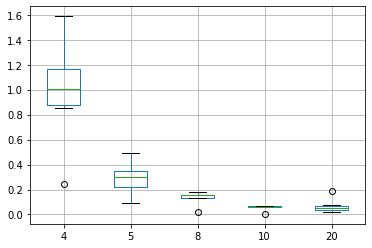

In [43]:
boxplot_21 = mse_batch_bilstm2.boxplot(column=[4,5,8,10,20])

###**Lstm**

In [44]:
mse_batch_lstm2 = pd.DataFrame.from_dict(mse_dict_lstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_lstm2

,4,5,8,10,20
mean,1.306360,1.004879,0.766194,0.677972,0.584706
std,0.112956,0.140838,0.088582,0.053787,0.062810
min,1.088805,0.722035,0.578868,0.603153,0.465997
25%,1.292880,0.932679,0.729402,0.632443,0.544122
50%,1.311843,0.999157,0.757427,0.685670,0.590308
75%,1.339290,1.117379,0.831872,0.726017,0.621763
max,1.500313,1.178576,0.896960,0.742836,0.679123


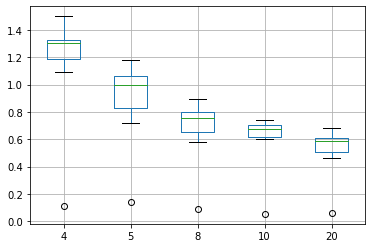

In [45]:
boxplot_22 = mse_batch_lstm2.boxplot(column=[4,5,8,10,20])

###**GRU**

In [46]:
mse_batch_gru2 = pd.DataFrame.from_dict(mse_dict_gru2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_gru2

,4,5,8,10,20
mean,1.401021,1.067168,0.834006,0.727517,0.621954
std,0.075771,0.114124,0.071952,0.047595,0.039962
min,1.272156,0.920805,0.700900,0.666045,0.561676
25%,1.347985,0.995512,0.784365,0.703044,0.585119
50%,1.403227,1.055167,0.846267,0.711803,0.630749
75%,1.454435,1.080900,0.882749,0.741788,0.652885
max,1.526195,1.298768,0.939495,0.836246,0.670381


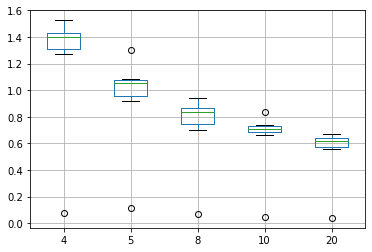

In [47]:
boxplot_23 = mse_batch_gru2.boxplot(column=[4,5,8,10,20])

##**Training the Models**

In [48]:
def best_fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = 20, 
                        shuffle = False, callbacks=[early_stop])
    return history

In [49]:
history_bilstm_best = best_fit_model(best_model_bilstm)

Epoch 1/7000
7/7 [==============================] - 0s 23ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 3.2030 - val_mse: 3.2030
Epoch 2/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 3.0751 - val_mse: 3.0751
Epoch 3/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 3.2110 - val_mse: 3.2110
Epoch 4/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 3.1067 - val_mse: 3.1067
Epoch 5/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 3.1931 - val_mse: 3.1931
Epoch 6/7000
7/7 [==============================] - 0s 20ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 3.1271 - val_mse: 3.1271
Epoch 7/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 3.1958 - val_mse: 3.1958
Epoch 8/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.0138 - m

In [50]:
history_lstm_best = best_fit_model(best_model_lstm)

Epoch 1/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 2.5902 - val_mse: 2.5902
Epoch 2/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 2.9807 - val_mse: 2.9807
Epoch 3/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.5264 - mse: 0.5264 - val_loss: 2.8618 - val_mse: 2.8618
Epoch 4/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.5220 - mse: 0.5220 - val_loss: 2.6345 - val_mse: 2.6345
Epoch 5/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.4970 - mse: 0.4970 - val_loss: 2.8836 - val_mse: 2.8836
Epoch 6/7000
7/7 [==============================] - 0s 14ms/step - loss: 0.5665 - mse: 0.5665 - val_loss: 2.5168 - val_mse: 2.5168
Epoch 7/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 2.8130 - val_mse: 2.8130
Epoch 8/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.6105 - m

In [51]:
history_gru_best = best_fit_model(best_model_gru)

Epoch 1/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.6440 - mse: 0.6440 - val_loss: 2.2138 - val_mse: 2.2138
Epoch 2/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.6699 - mse: 0.6699 - val_loss: 2.2752 - val_mse: 2.2752
Epoch 3/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.5545 - mse: 0.5545 - val_loss: 2.4661 - val_mse: 2.4661
Epoch 4/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6482 - mse: 0.6482 - val_loss: 2.2368 - val_mse: 2.2368
Epoch 5/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.5487 - mse: 0.5487 - val_loss: 2.3234 - val_mse: 2.3234
Epoch 6/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.5357 - mse: 0.5357 - val_loss: 2.3483 - val_mse: 2.3483
Epoch 7/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.6092 - mse: 0.6092 - val_loss: 2.3051 - val_mse: 2.3051
Epoch 8/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.5172 - m

##**Plotting train loss and validation loss graph**

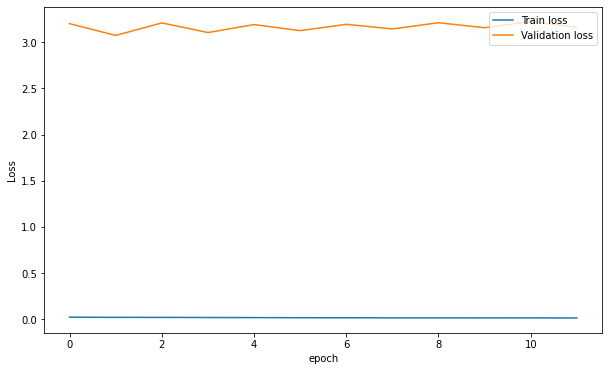

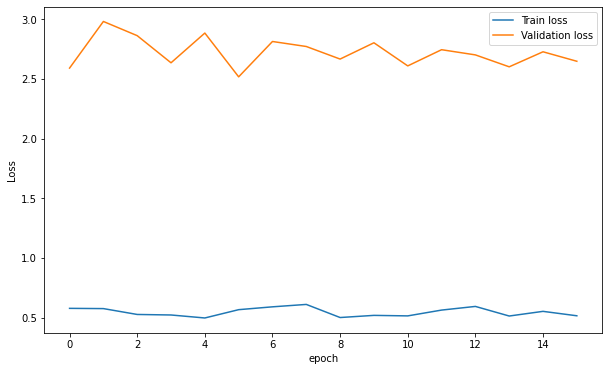

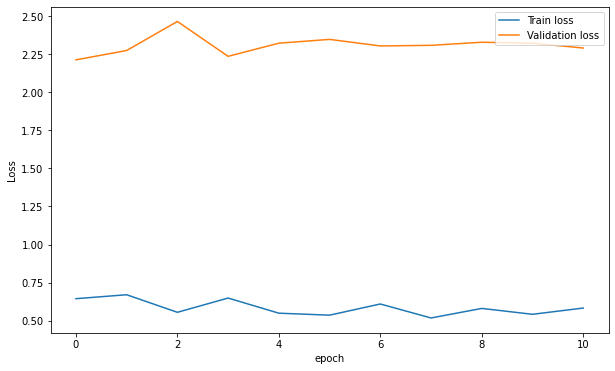

In [52]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm_best)
plot_loss (history_lstm_best)
plot_loss (history_gru_best)

##**Testing the models**

In [53]:
dataset_X_test1 = dataset_X_test.values.reshape(40,10,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def best_prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm_best = best_prediction_func(best_model_bilstm)
prediction_lstm_best = best_prediction_func(best_model_lstm)
prediction_gru_best = best_prediction_func(best_model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
print(classification_report(prediction_bilstm_best.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm_best.round(), dataset_y_test))
print(classification_report(prediction_lstm_best.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_lstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru_best.round(), dataset_y_test))
print(classification_report(prediction_gru_best.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_gru_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru_best.round(), dataset_y_test,average='macro'))

Accuracy :  0.375
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.42      0.56      0.48         9
         2.0       0.29      0.33      0.31         6
         3.0       0.50      0.22      0.31         9
         4.0       0.00      0.00      0.00         2
         5.0       0.25      0.40      0.31         5
         6.0       0.57      1.00      0.73         4
         7.0       0.00      0.00      0.00         3

    accuracy                           0.38        40
   macro avg       0.25      0.31      0.27        40
weighted avg       0.34      0.38      0.33        40

Accuracy :  0.45
              precision    recall  f1-score   support

         1.0       0.58      0.78      0.67         9
         2.0       0.57      0.40      0.47        10
         3.0       0.25      0.25      0.25         4
         4.0       1.00      0.50      0.67         4
         5.0       0.25      0.40      0.31

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


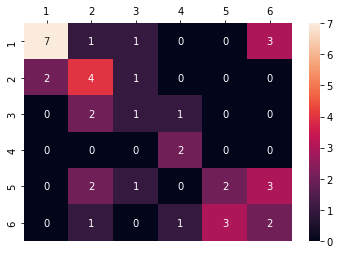

In [69]:
dl_cm = confusion_matrix( dataset_y_test,prediction_lstm_best.round())
ax = sns.heatmap(dl_cm,xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6],annot=True)
ax.xaxis.set_ticks_position('top')
plt.show()

#**Scores Evaluation**

In [55]:
scores = pd.DataFrame (Classifier,columns=['Classifier'])
scores['Type'] = Type
scores['Hyperparameter_Tuning'] = hyper
scores['Accuracy'] = Accuracy
scores['Recall'] = Recall
scores['Precision'] = Precision
scores['F1_score'] = F1_score

In [56]:
scores

,Classifier,Type,Hyperparameter_Tuning,Accuracy,Recall,Precision,F1_score
0,SVM,ML,No,0.350,0.224206,0.155556,0.164815
1,LR,ML,No,0.250,0.243056,0.143056,0.155723
2,RF,ML,No,0.500,0.448413,0.426781,0.401204
3,SVM,ML,Yes,0.375,0.297619,0.293651,0.272106
4,LR,ML,Yes,0.450,0.388889,0.400000,0.387916
5,RF,ML,Yes,0.525,0.490079,0.510908,0.423294
6,BILSTM,DL,No,0.300,0.442235,0.350198,0.294569
7,LSTM,DL,No,0.150,0.222222,0.160714,0.120471
8,GRU,DL,No,0.225,0.346639,0.281746,0.202261
9,BILSTM,DL,Yes,0.375,0.313889,0.252976,0.265818


##**Comparision of Machine Learning models before and after hyperparameter tuning**

In [57]:
ml_scores = scores.loc[scores['Type']=="ML"]

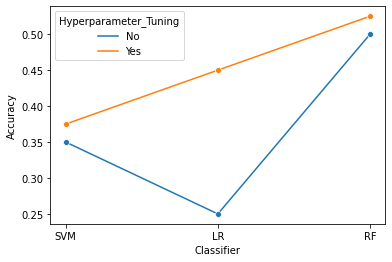

In [58]:
import seaborn as sns
sns.lineplot(x='Classifier',y='Accuracy',data=ml_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Deep Learning models before and after hyperparameter tuning**

In [59]:
dl_scores= scores.loc[scores['Type']=="DL"]

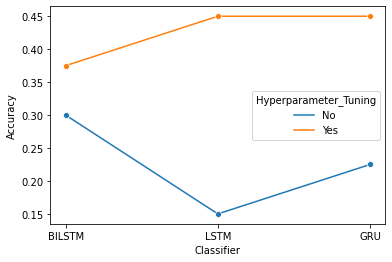

In [60]:
sns.lineplot(x='Classifier',y='Accuracy',data=dl_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Machine Learning and Deep Learning models after hyperparameter tuning as performance was better only after hyperparameter tuning**

In [61]:
com_scores = scores.loc[scores['Hyperparameter_Tuning']=="Yes"]

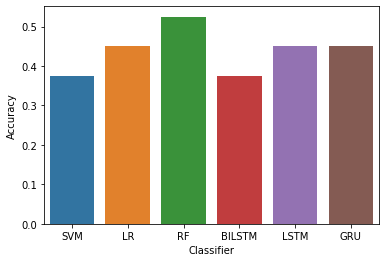

In [62]:
sns.barplot(x='Classifier',y='Accuracy',data=com_scores)

In [63]:
scores.to_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Results/M2(b.1).csv",index=False)